In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import random
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [0]:
os.chdir('x_train')

In [0]:
x_train = []
y_train = np.zeros((20000,1))
for i in range (20000):
    img = random.choice(os.listdir())
    if img.split(".")[-1]=="jpg":
        imgVec = np.array(Image.open(img))
        x_train.append(imgVec)
    if img.split(".")[-3] == "cat":
        y_train[i,0] = 1
x_train = np.array(x_train)

In [0]:
print(x_train.shape)
print(y_train.shape)

(20000, 50, 50, 3)
(20000, 1)


In [0]:
print ('Number of training examples :'+str(x_train.shape[0]))
print ('Dimension of the x_train :'+str(x_train.shape))
print ('Dimension of the y_train :'+ str(y_train.shape))
print ('Resolution of each image :'+ str(x_train[0].shape))

Number of training examples :20000
Dimension of the x_train :(20000, 50, 50, 3)
Dimension of the y_train :(20000, 1)
Resolution of each image :(50, 50, 3)


In [0]:
x_train = x_train/255
x_train = x_train.reshape(x_train.shape[0], -1)
print (x_train.shape)

(20000, 7500)


In [0]:
train_x , test_x , train_y , test_y = train_test_split(x_train, y_train, test_size = 0.1 , random_state = 42)

In [0]:
print (train_x.shape)
print (train_y.shape)
print (test_x.shape)
print (test_y.shape)

(18000, 7500)
(18000, 1)
(2000, 7500)
(2000, 1)


In [0]:
x_train , x_test , y_train , y_test = train_x.T , test_x.T , train_y.T , test_y.T

In [0]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(7500, 18000)
(7500, 2000)
(1, 18000)
(1, 2000)


In [0]:
def initialize_parameters(layer_dim):
    np.random.seed(1)
    l = len(layer_dim) -1
    parameters = {}
    for i in range(1,l+1):
        parameters['w'+str(i)] = np.random.randn(layer_dim[i], layer_dim[i-1])*np.sqrt(2/layer_dim[i-1])
        print("Initialized w"+str(i)+":"+str(parameters['w'+str(i)].shape))
        parameters['b'+str(i)] = np.zeros((layer_dim[i],1))
        print("Initialized b"+str(i)+":"+str(parameters['b'+str(i)].shape))
    return parameters

In [0]:
def sigmoid(x):
    z = 1/(1+np.exp(-x))
    return z

def relu(x):
    z = np.maximum(0, x)
    return z

In [0]:
def random_mini_batches(X , Y, mini_batch_size = 64 , seed = 0):
    mini_batches = []
    np.random.seed(seed+1)
    m = X.shape[1]
    permutation = list(np.random.permutation(m))
    
    shuffled_x = X[:, permutation]
    shuffled_y = Y[:, permutation]
    
    num_of_complete_mini_batches = math.floor(m/mini_batch_size)
    n = num_of_complete_mini_batches
    #print ("No of complete minibatches : "+str(n))
    
    for i in range (1, n+1):
        mini_batch_x = shuffled_x[:, (i-1)*mini_batch_size : i*mini_batch_size]
        mini_batch_y = shuffled_y[:, (i-1)*mini_batch_size : i*mini_batch_size]
        mini_batch = (mini_batch_x, mini_batch_y)
        mini_batches.append(mini_batch)
        
    last_mini_batch_x = shuffled_x[:, n*mini_batch_size : m]
    last_mini_batch_y = shuffled_y[:, n*mini_batch_size : m]
    last_mini_batch = (last_mini_batch_x , last_mini_batch_y)
    mini_batches.append(last_mini_batch)
    #print("Total minibatches : "+str(len(mini_batches)))
    
    return mini_batches

In [0]:
def forward_propagation(parameters , X):
    l = len(parameters)//2
    cache = {}
    A = X
    cache['a'+str(0)] = A
    for i in range (1, l):
        A_prev = A
        z = np.dot(parameters['w'+str(i)], A_prev) + parameters['b'+str(i)]
        A = relu(z)
        cache['w'+str(i)] = parameters['w'+str(i)]
        #print ("w"+str(i)+":"+str(cache['w'+str(i)].shape))
        cache['b'+str(i)] = parameters['b'+str(i)]
        #print ("b"+str(i)+":"+str(cache['b'+str(i)].shape))
        cache['z'+str(i)] = z
        #print ("z"+str(i)+":"+str(cache['z'+str(i)].shape))
        cache['a'+str(i)] = A
        #print ("a"+str(i)+":"+str(cache['a'+str(i)].shape))
        
    z = np.dot(parameters['w'+str(l)], A) + parameters['b'+str(l)]
    A = sigmoid(z)
    cache['w'+str(l)] = parameters['w'+str(l)]
    #print ("w"+str(l)+":"+str(cache['w'+str(l)].shape))
    cache['b'+str(l)] = parameters['b'+str(l)]
    #print ("b"+str(l)+":"+str(cache['b'+str(l)].shape))
    cache['z'+str(l)] = z
    #print ("z"+str(l)+":"+str(cache['z'+str(l)].shape))
    cache['a'+str(l)] = A
    #print ("a"+str(l)+":"+str(cache['a'+str(l)].shape))
    
    return A , cache

In [0]:
def backward_propagation(A, Y, cache):
    l = len(cache)//4
    #print ("A shape :"+str(A.shape))
    #print ("Y shape :"+str(Y.shape))
    grads = {}
    m = Y.shape[1]
    
    grads['dz'+str(l)] = (1./m)*(A - Y)
    #print("dz"+str(l)+":"+str(grads['dz'+str(l)].shape))
    grads['dw'+str(l)] = np.dot(grads['dz'+str(l)] , cache['a'+str(l-1)].T)
    #print("dw"+str(l)+":"+str(grads['dw'+str(l)].shape))
    grads['db'+str(l)] = np.sum(grads['dz'+str(l)] , axis = 1, keepdims =True)
    #print("db"+str(l)+":"+str(grads['db'+str(l)].shape))
    
    for i in range(l-1,0,-1):
        grads['da'+str(i)] = np.dot(cache['w'+str(i+1)].T, grads['dz'+str(i+1)])
        #print("da"+str(i)+":"+str(grads['da'+str(i)].shape))
        grads['dz'+str(i)] = np.multiply(grads['da'+str(i)], np.int64(cache['a'+str(i)]>0))
        #print("dz"+str(i)+":"+str(grads['dz'+str(i)].shape))
        grads['dw'+str(i)] = np.dot(grads['dz'+str(i)], cache['a'+str(i-1)].T)
        #print("dw"+str(i)+":"+str(grads['dw'+str(i)].shape))
        grads['db'+str(i)] = np.sum(grads['dz'+str(i)],axis=1, keepdims=True)
        #print("db"+str(i)+":"+str(grads['db'+str(i)].shape))
        
    return grads

In [0]:
def compute_cost(a,y):
    m = y.shape[1]
    logprobs = np.multiply(-np.log(a) , y) + np.multiply(-np.log(1-a) , (1-y))
    cost = (1./m)*np.sum(logprobs)
    return cost

In [0]:
def adam_optimizer(parameters, grads, beta1 = 0.9 , beta2 = 0.999 , learning_rate=0.006,  epsilon = 1e-8):
    l = len(parameters)//2
    seed = 0
    np.random.seed(seed+1)
    
    v = {}
    s = {}
    v_corrected = {}
    s_corrected = {}
    
    for i in range(1,l+1):
        # v,s initialization
        v['dw'+str(i)] = np.zeros((parameters['w'+str(i)].shape))
        v['db'+str(i)] = np.zeros((parameters['b'+str(i)].shape))
        s['dw'+str(i)] = np.zeros((parameters['w'+str(i)].shape))
        s['db'+str(i)] = np.zeros((parameters['b'+str(i)].shape))
        
        # updating with exponentially weighted avarages
        v['dw'+str(i)] = beta1*v['dw'+str(i)] + (1-beta1)*grads['dw'+str(i)]
        v['db'+str(i)] = beta1*v['db'+str(i)] + (1-beta1)*grads['db'+str(i)]
        s['dw'+str(i)] = beta2*s['dw'+str(i)] + (1-beta2)*grads['dw'+str(i)]
        s['db'+str(i)] = beta2*s['db'+str(i)] + (1-beta2)*grads['db'+str(i)]
        
        # correcting the v,s
        v_corrected['dw'+str(i)] = v['dw'+str(i)]/(1-np.power(beta1,2))
        v_corrected['db'+str(i)] = v['db'+str(i)]/(1-np.power(beta1,2))
        s_corrected['dw'+str(i)] = v['dw'+str(i)]/(1-np.power(beta2,2))
        print ("s_corr_dw "+str(i)+":"+str(s_corrected['dw'+str(i)]))
        s_corrected['db'+str(i)] = v['db'+str(i)]/(1-np.power(beta2,2))
        print (str("s_corr_db "+str(i)+":"+str(s_corrected['db'+str(i)])))
        
        # updating parameters
        parameters['w'+str(i)] = parameters['w'+str(i)] - learning_rate*(v_corrected['dw'+str(i)]/((np.sqrt(s_corrected['dw'+str(i)]))+epsilon))
        parameters['b'+str(i)] = parameters['b'+str(i)] - learning_rate*(v_corrected['db'+str(i)]/((np.sqrt(s_corrected['db'+str(i)]))+epsilon))
        
    return parameters

In [0]:
def momentum(parameters, grads, beta1 = 0.9 , beta2 = 0.999 , learning_rate=0.006,  epsilon = 1e-8):
    l = len(parameters)//2
    seed = 0
    np.random.seed(seed+1)
    
    v = {}
    
    for i in range(1,l+1):
        # v,s initialization
        v['dw'+str(i)] = np.zeros((parameters['w'+str(i)].shape))
        v['db'+str(i)] = np.zeros((parameters['b'+str(i)].shape))

        # updating with exponentially weighted avarages
        v['dw'+str(i)] = beta1*v['dw'+str(i)] + (1-beta1)*grads['dw'+str(i)]
        v['db'+str(i)] = beta1*v['db'+str(i)] + (1-beta1)*grads['db'+str(i)]

        # updating parameters
        parameters['w'+str(i)] = parameters['w'+str(i)] - learning_rate*v['dw'+str(i)]
        parameters['b'+str(i)] = parameters['b'+str(i)] - learning_rate*v['db'+str(i)]
        
    return parameters

In [0]:
def model(x_train, y_train, layer_dim, epochs=1000,learning_rate=0.006, print_cost = True):
    
    L = len(layer_dim)
    costs = []
    seed = 10
    
    parameters = initialize_parameters(layer_dim)
    
    for i in range(epochs):
        seed = seed + 1
        minibatches = random_mini_batches(x_train , y_train , mini_batch_size = 64)
        #counter = 0
        
        for minibatch in minibatches:
            (minibatch_x,minibatch_y) = minibatch
            
            #counter = counter + 1
            #print ("Minibatch "+str(counter)+" shapes :")
            #print (minibatch_x.shape)
            #print (minibatch_y.shape)
            
            A, cache = forward_propagation(parameters , minibatch_x)
            
            cost = compute_cost(A, minibatch_y)
            grads = backward_propagation(A, minibatch_y , cache)
            #params = adam_optimizer(parameters , grads)
            params = momentum(parameters , grads)
        
        if print_cost and i % 100 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    
    return params

Initialized w1:(20, 7500)
Initialized b1:(20, 1)
Initialized w2:(10, 20)
Initialized b2:(10, 1)
Initialized w3:(5, 10)
Initialized b3:(5, 1)
Initialized w4:(1, 5)
Initialized b4:(1, 1)
Cost after epoch 0: 0.684191
Cost after epoch 100: 0.296738
Cost after epoch 200: 0.182190
Cost after epoch 300: 0.070934
Cost after epoch 400: 0.048914
Cost after epoch 500: 0.026079
Cost after epoch 600: 0.011059


/home/iamnildas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/iamnildas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Cost after epoch 700: 0.009709
Cost after epoch 800: 0.004010
Cost after epoch 900: 0.003157


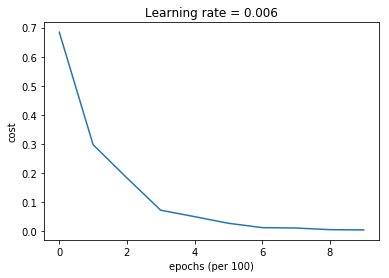

In [0]:
layer_dim = [x_train.shape[0],20, 10, 5, 1]
parameters = model(x_train, y_train, layer_dim)

In [0]:
def predict(parameters , x, y):
    
    m = y.shape[1]
    p = np.zeros((1,m))

    yhat , cache = forward_propagation(parameters , x)
    
    for i in range (m):
        if yhat[0][i] > 0.5:
            p[0][i] = 1
    
    print ("Accuracy : "+str(np.sum((p == y)/m)*100)+" percent")

In [0]:
prediction = predict(parameters , x_train, y_train)

Accuracy : 99.6222222222222 percent


In [0]:
test_pred = predict(parameters , x_test, y_test)

Accuracy : 81.85000000000002 percent
